# Assignment 4:
## Build a computer vision project (object detection/classification).

In [112]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, Input, layers
from keras.datasets import cifar10
from keras import Sequential


## 1. Test and Train Split

In [67]:
# setting it at 42 makes your code predictable by keeping the random parts the same every time you run it.
tf.random.set_seed(42)


In [68]:
# Loading our Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [69]:
# Checking the shapes of our training and testing dataset
print("Training Data Shape: ", X_train.shape)
print("Training Data Labels: ", y_train.shape)
print("Test Data Shape: ", X_test.shape)
print("Testing Data Labels: ", y_test.shape)

# These images are already in 32 * 32 and are in RGB, so no need for pixel normalization and Channel Addition.

Training Data Shape:  (50000, 32, 32, 3)
Training Data Labels:  (50000, 1)
Test Data Shape:  (10000, 32, 32, 3)
Testing Data Labels:  (10000, 1)


In [70]:
# Defining The classes names for labels
classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]


/tmp/ipython-input-760980327.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[i])], fontsize=8)


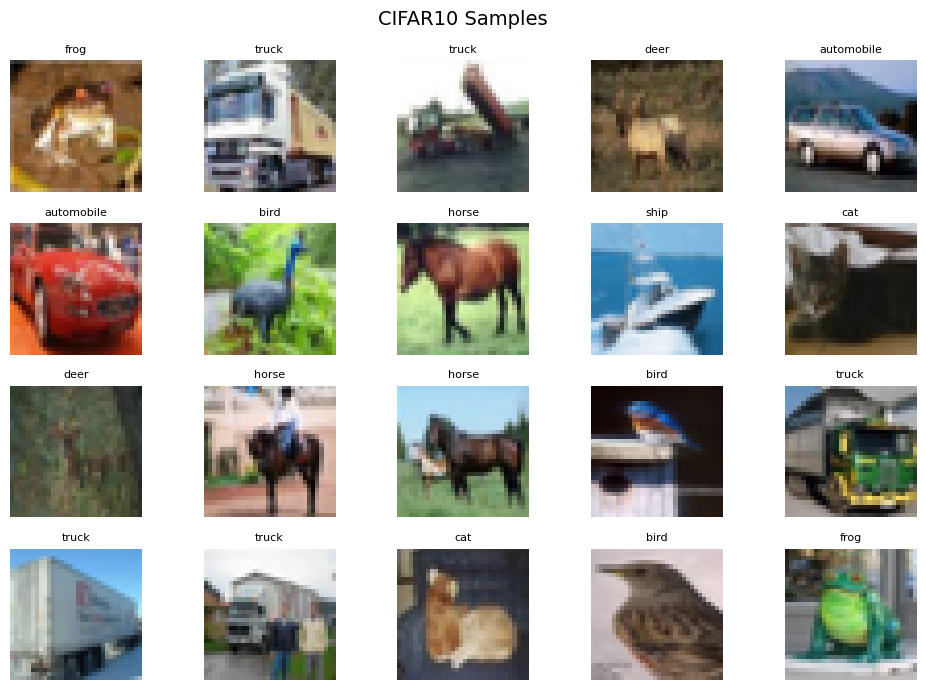

In [106]:

# Now Visualizing our dataset
# Plot 20 images from the training set
# Deciding the size foe our plot
plt.figure(figsize=(10, 7))

# plt.imshow(X_train[i], cmap='gray')- Shows i-th image from training set X_train in black-and-white (cmap='gray').
# y_train[i] gives the number (like 0, 2, etc.). labels[...] converts that number into a word.
# plt.axis('off') - This hides the x and y axes (the number lines around the image) — makes it cleaner.
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(classes[int(y_train[i])], fontsize=8)
    plt.axis('off')

# plt.tight_layout(): Fixes spacing so images don’t overlap.
plt.suptitle("CIFAR10 Samples", fontsize=14)
plt.tight_layout()

# Showing graph
plt.show()


## 2. Pixel Normalization

In [71]:
# By default, the image data might be in integers (like 0, 255), so we convert it to floats.
# .astype("float32") - This changes the pixel values to a special number format called float32
# Dividing by 255.0 changes the pixel values to be between 0 and 1.
X_test = X_test.astype('float32') / 255.0
X_train = X_train.astype('float32') / 255.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


## 3. Data Augmentation

In [72]:
# RandomFlip("horizontal") → Randomly flips the image left ↔ right.
# RandomRotation(0.1) → Rotates the image a little (up to ~10% of 360°, i.e. about 36°).
# RandomZoom(0.1) → Randomly zooms in/out by 10%.
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


## 4. Building a CNN Model

In [73]:
# Creating a Sequential CNN Model
# Using data augmentation, dropout and batch normalization
# BatchNormalization() is a special layer in deep learning that helps CNN learn faster and better.
model = models.Sequential([
    # Step 1: Define input shape - images are 32x32 pixels with 3 color channel (BGR).
    layers.Input(shape=(32,32,3)),

    # Applying Data Augmentation
    data_augmentation,

    # Conv block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Conv block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Conv block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Flatten + Dense
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    # Step 9: Output layer with 10 neurons (for 10 classes), 'softmax' turns output into probabilities for each class
    layers.Dense(10, activation='softmax')
])


## 5. Model Summary

In [74]:
# Model Summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

## 6. Model Compilation

In [75]:
# Compiling our model
# using sparse_categorical_crossentropy because our labels are integers instead of one-hot vectors
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


## 7. CallBacks

In [108]:
# Importing Necessary Library
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# # Saving the model only when it gets better (best val_accuracy)
checkpoint = ModelCheckpoint(
    "best_cifar10.h5", save_best_only=True, monitor="val_accuracy", mode="max"
)

# # If val_loss stops improving, cut learning rate in half (factor=0.5)
# Wait 5 epochs before reducing
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=5, verbose=1
)


## 8. Model Training

In [77]:
# Training our Model
history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, reduce_lr],
    verbose = 1
)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3440 - loss: 1.9118

782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 213ms/step - accuracy: 0.3441 - loss: 1.9115 - val_accuracy: 0.5172 - val_loss: 1.3397 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.4972 - loss: 1.3996

782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 212ms/step - accuracy: 0.4973 - loss: 1.3995 - val_accuracy: 0.6120 - val_loss: 1.0843 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 214ms/step - accuracy: 0.5601 - loss: 1.2392 - val_accuracy: 0.6005 - val_loss: 1.1555 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.5952 - loss: 1.1527 - val_accuracy: 0.6074 - val_loss: 1.1405 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6216 - loss: 1.0834

782/782 ━━━━━━━━━━━━━━━━━━━━ 196s 206ms/step - accuracy: 0.6216 - loss: 1.0834 - val_accuracy: 0.6206 - val_loss: 1.1267 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6385 - loss: 1.0274

782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 210ms/step - accuracy: 0.6386 - loss: 1.0273 - val_accuracy: 0.6909 - val_loss: 0.9262 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 212ms/step - accuracy: 0.6584 - loss: 0.9879 - val_accuracy: 0.6683 - val_loss: 0.9580 - learning_rate: 0.0010
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6716 - loss: 0.9445

782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step - accuracy: 0.6716 - loss: 0.9445 - val_accuracy: 0.6973 - val_loss: 0.8917 - learning_rate: 0.0010
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 197ms/step - accuracy: 0.6862 - loss: 0.9086 - val_accuracy: 0.6748 - val_loss: 0.9801 - learning_rate: 0.0010
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6915 - loss: 0.8913

782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 199ms/step - accuracy: 0.6915 - loss: 0.8913 - val_accuracy: 0.7048 - val_loss: 0.8607 - learning_rate: 0.0010
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 209s 208ms/step - accuracy: 0.7007 - loss: 0.8709 - val_accuracy: 0.6740 - val_loss: 0.9561 - learning_rate: 0.0010
Epoch 12/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.7105 - loss: 0.8449

782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.7105 - loss: 0.8449 - val_accuracy: 0.7341 - val_loss: 0.7926 - learning_rate: 0.0010
Epoch 13/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - accuracy: 0.7165 - loss: 0.8253 - val_accuracy: 0.7215 - val_loss: 0.8254 - learning_rate: 0.0010
Epoch 14/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.7263 - loss: 0.8007 - val_accuracy: 0.7227 - val_loss: 0.8240 - learning_rate: 0.0010
Epoch 15/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7288 - loss: 0.7865

782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 209ms/step - accuracy: 0.7288 - loss: 0.7865 - val_accuracy: 0.7428 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 16/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 210ms/step - accuracy: 0.7306 - loss: 0.7758 - val_accuracy: 0.7011 - val_loss: 0.9650 - learning_rate: 0.0010
Epoch 17/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 210ms/step - accuracy: 0.7381 - loss: 0.7578 - val_accuracy: 0.7417 - val_loss: 0.7936 - learning_rate: 0.0010
Epoch 18/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.7453 - loss: 0.7445

782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.7453 - loss: 0.7444 - val_accuracy: 0.7597 - val_loss: 0.7144 - learning_rate: 0.0010
Epoch 19/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.7470 - loss: 0.7281 - val_accuracy: 0.7296 - val_loss: 0.7992 - learning_rate: 0.0010
Epoch 20/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.7531 - loss: 0.7128 - val_accuracy: 0.7427 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 21/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 211ms/step - accuracy: 0.7600 - loss: 0.6986 - val_accuracy: 0.7582 - val_loss: 0.7233 - learning_rate: 0.0010
Epoch 22/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 212ms/step - accuracy: 0.7628 - loss: 0.6912 - val_accuracy: 0.7151 - val_loss: 0.8682 - learning_rate: 0.0010
Epoch 23/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7664 - loss: 0.6813


Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.7664 - loss: 0.6812 - val_accuracy: 0.7639 - val_loss: 0.7428 - learning_rate: 0.0010
Epoch 24/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7795 - loss: 0.6377

782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.7795 - loss: 0.6377 - val_accuracy: 0.7751 - val_loss: 0.6814 - learning_rate: 5.0000e-04
Epoch 25/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7900 - loss: 0.6047

782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 212ms/step - accuracy: 0.7900 - loss: 0.6047 - val_accuracy: 0.7839 - val_loss: 0.6640 - learning_rate: 5.0000e-04
Epoch 26/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7906 - loss: 0.5990

782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 204ms/step - accuracy: 0.7906 - loss: 0.5990 - val_accuracy: 0.7889 - val_loss: 0.6294 - learning_rate: 5.0000e-04
Epoch 27/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.7980 - loss: 0.5847

782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.7980 - loss: 0.5847 - val_accuracy: 0.7923 - val_loss: 0.6355 - learning_rate: 5.0000e-04
Epoch 28/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 195s 210ms/step - accuracy: 0.8031 - loss: 0.5708 - val_accuracy: 0.7777 - val_loss: 0.6727 - learning_rate: 5.0000e-04
Epoch 29/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.8011 - loss: 0.5709 - val_accuracy: 0.7749 - val_loss: 0.6925 - learning_rate: 5.0000e-04
Epoch 30/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.8070 - loss: 0.5600 - val_accuracy: 0.7832 - val_loss: 0.6685 - learning_rate: 5.0000e-04
Epoch 31/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8083 - loss: 0.5517

782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 210ms/step - accuracy: 0.8083 - loss: 0.5517 - val_accuracy: 0.8036 - val_loss: 0.5975 - learning_rate: 5.0000e-04
Epoch 32/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 211ms/step - accuracy: 0.8106 - loss: 0.5510 - val_accuracy: 0.7807 - val_loss: 0.6730 - learning_rate: 5.0000e-04
Epoch 33/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 212ms/step - accuracy: 0.8123 - loss: 0.5512 - val_accuracy: 0.7945 - val_loss: 0.6508 - learning_rate: 5.0000e-04
Epoch 34/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 213ms/step - accuracy: 0.8126 - loss: 0.5387 - val_accuracy: 0.7895 - val_loss: 0.6526 - learning_rate: 5.0000e-04
Epoch 35/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.8118 - loss: 0.5365 - val_accuracy: 0.7975 - val_loss: 0.6252 - learning_rate: 5.0000e-04
Epoch 36/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8189 - loss: 0.5233


Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 217ms/step - accuracy: 0.8189 - loss: 0.5233 - val_accuracy: 0.8040 - val_loss: 0.6176 - learning_rate: 5.0000e-04
Epoch 37/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8224 - loss: 0.5063

782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 212ms/step - accuracy: 0.8224 - loss: 0.5063 - val_accuracy: 0.8055 - val_loss: 0.6087 - learning_rate: 2.5000e-04
Epoch 38/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 211ms/step - accuracy: 0.8301 - loss: 0.4884 - val_accuracy: 0.7993 - val_loss: 0.6158 - learning_rate: 2.5000e-04
Epoch 39/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8300 - loss: 0.4871

782/782 ━━━━━━━━━━━━━━━━━━━━ 195s 202ms/step - accuracy: 0.8300 - loss: 0.4871 - val_accuracy: 0.8101 - val_loss: 0.5876 - learning_rate: 2.5000e-04
Epoch 40/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 198ms/step - accuracy: 0.8320 - loss: 0.4837 - val_accuracy: 0.7977 - val_loss: 0.6285 - learning_rate: 2.5000e-04
Epoch 41/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 202ms/step - accuracy: 0.8324 - loss: 0.4734 - val_accuracy: 0.8070 - val_loss: 0.5965 - learning_rate: 2.5000e-04
Epoch 42/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 209ms/step - accuracy: 0.8357 - loss: 0.4734 - val_accuracy: 0.7939 - val_loss: 0.6452 - learning_rate: 2.5000e-04
Epoch 43/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 213ms/step - accuracy: 0.8346 - loss: 0.4744 - val_accuracy: 0.7902 - val_loss: 0.6538 - learning_rate: 2.5000e-04
Epoch 44/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8355 - loss: 0.4700


Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 209ms/step - accuracy: 0.8355 - loss: 0.4700 - val_accuracy: 0.8162 - val_loss: 0.5930 - learning_rate: 2.5000e-04
Epoch 45/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 210ms/step - accuracy: 0.8391 - loss: 0.4557 - val_accuracy: 0.8018 - val_loss: 0.6267 - learning_rate: 1.2500e-04
Epoch 46/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - accuracy: 0.8413 - loss: 0.4537 - val_accuracy: 0.7986 - val_loss: 0.6344 - learning_rate: 1.2500e-04
Epoch 47/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 212s 220ms/step - accuracy: 0.8436 - loss: 0.4491 - val_accuracy: 0.7980 - val_loss: 0.6425 - learning_rate: 1.2500e-04
Epoch 48/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 194s 210ms/step - accuracy: 0.8451 - loss: 0.4436 - val_accuracy: 0.7961 - val_loss: 0.6520 - learning_rate: 1.2500e-04
Epoch 49/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.8434 - loss: 0.4484
Epoch 49: ReduceLROnPlateau reducing lea

## 9. Visualization Of Accuracy And Loss

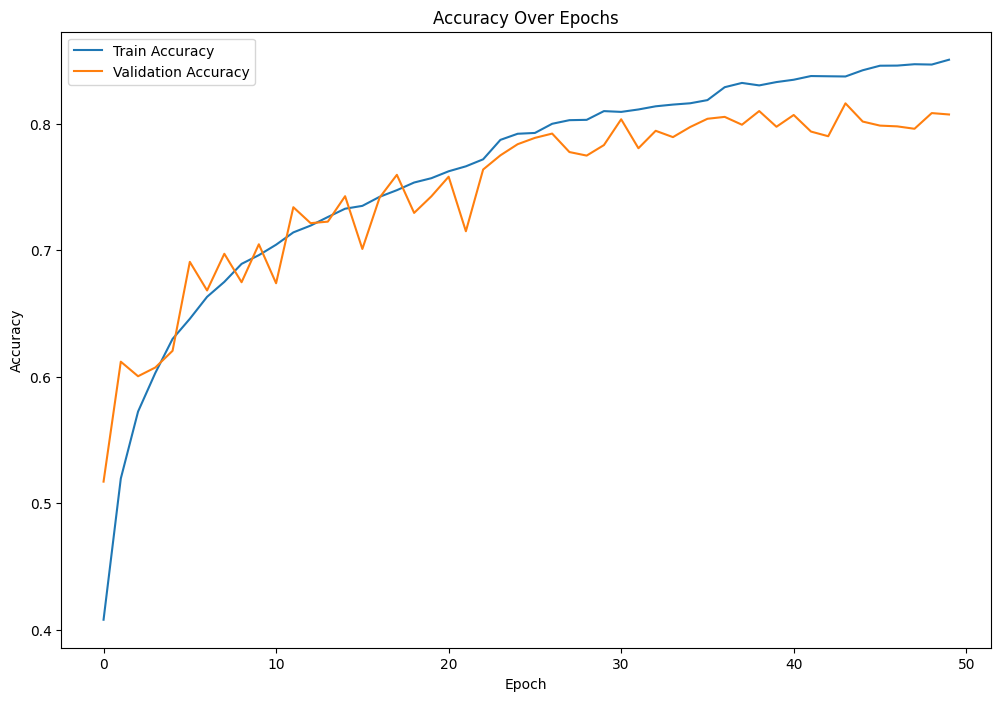

In [78]:
# Selecting the size for the plot
plt.figure(figsize = (12, 8))

# Making the train and test accuracy plot
plt.plot(history.history['accuracy'], label= "Train Accuracy")
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')

# Deciding the title and the labels, providing legend
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Showing both plots
plt.show()


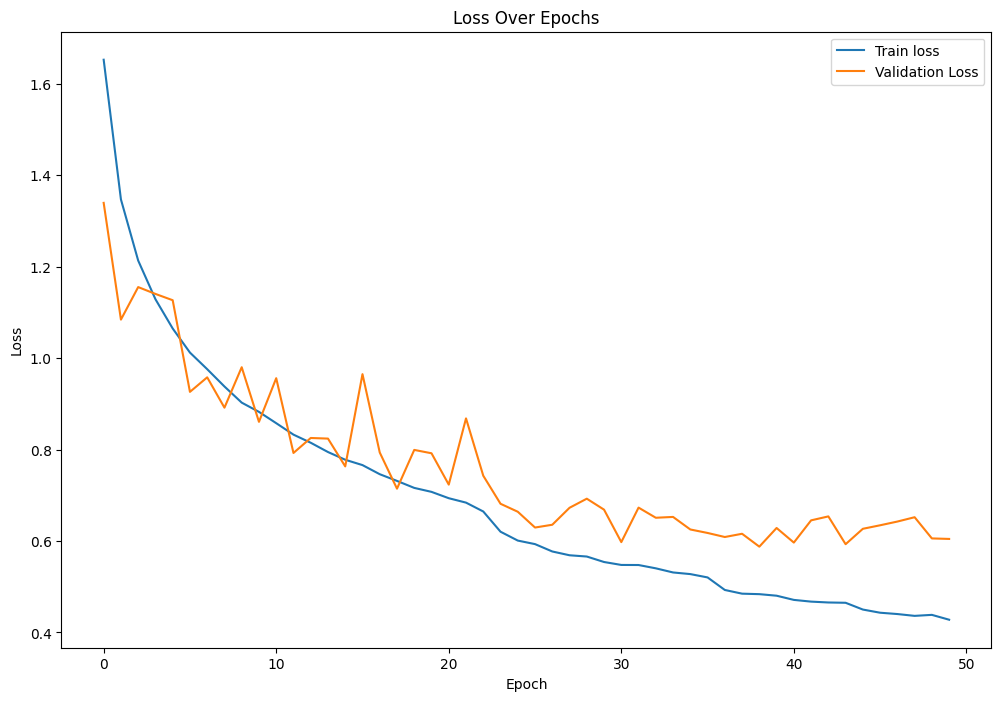

In [79]:
# Selecting the size for the plot
plt.figure(figsize = (12, 8))

# Makaing plot for loss
plt.plot(history.history['loss'], label= "Train loss")
plt.plot(history.history['val_loss'], label = 'Validation Loss')

# Deciding the title and labels and providing the label
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Showing both plots
plt.show()


## 10. Model Evaluation

In [111]:
# Checking the test accuracy and loss
loss, acc = model.evaluate(X_test, y_test)

# Printing
print(f"Test Accuracy: {acc}")
print(f"Test Loss: {loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8083 - loss: 0.6097
Test Accuracy: 0.8073999881744385
Test Loss: 0.6045043468475342


In [82]:
# Checking the best test accuracy
best_model = models.load_model("best_cifar10.h5")
loss, acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Best model test accuracy: {acc:.4f}")

313/313 - 7s - 22ms/step - accuracy: 0.8162 - loss: 0.5930
Best model test accuracy: 0.8162


## 11. Prediction

In [83]:
# Doing Prediction of model
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis = 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


## 12. Image Prediction Visualization

/tmp/ipython-input-159036377.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {classes[pred_labels[i]]}\nActual: {classes[int(y_test[i])]}", fontsize = 8)


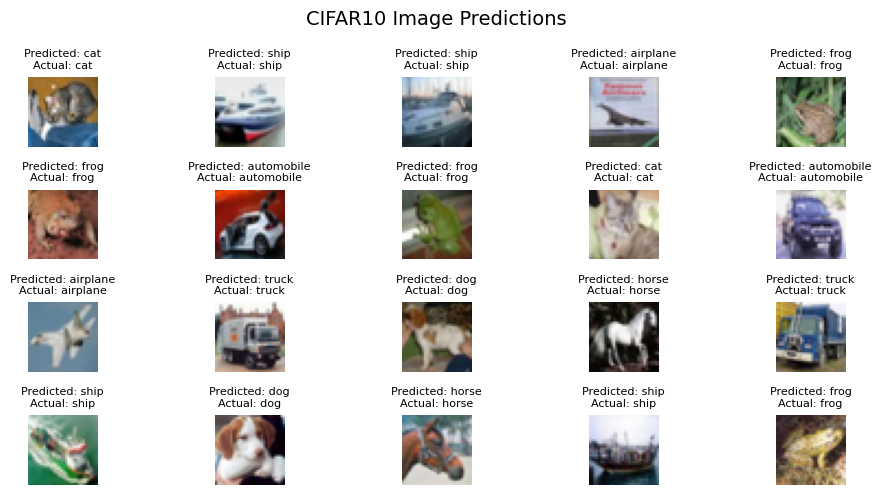

In [109]:
# Deciding size of plot
plt.figure(figsize=(10, 5))

# Using loop for displaying predictions
# .squeeze() - Removes any extra dimensions of size 1 from your data.
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(X_test[i].squeeze(), cmap='gray')
  plt.title(f"Predicted: {classes[pred_labels[i]]}\nActual: {classes[int(y_test[i])]}", fontsize = 8)
  plt.axis('off')

# Decising the title
plt.suptitle("CIFAR10 Image Predictions", fontsize=14)

# showing the plot
plt.tight_layout()
plt.show()
